In [13]:
import datetime

#データ解析用ライブラリ
import pandas as pd
import numpy as np

 
#データ可視化ライブラリ
import matplotlib.pyplot as plt
import seaborn as sns
 

#LightGBMライブラリ
import lightgbm as lgb

from sklearn.svm import SVR

In [14]:
def preprocessing(df, date_info_list):
    # 日付情報を取得
    dt_cont = dt1 = datetime.datetime(year= 2020, month = 1, day = 1)
    date_int_list = []

    for date_info in date_info_list:
        year = int(date_info.split('-')[0])
        month = int(date_info.split('-')[1])
        day = int(date_info.split('-')[2])
        date_temp= datetime.datetime(year= year, month = month, day = day)
        date_int_list.append((date_temp - dt_cont).days)
    df['Date_int'] = date_int_list
    
    # nanを埋める
    albania_len = len(df.loc[df['Country/Region'] == 'Albania','Lat'])
    df.loc[df['Country/Region'] == 'Albania','Lat'] =  [41.327953] * albania_len
    df.loc[df['Country/Region'] == 'Albania','Long'] = [19.819025] * albania_len
    
    aruba_len = len(df.loc[df['Country/Region'] == 'Aruba','Lat'] )
    df.loc[df['Country/Region'] == 'Aruba','Lat'] =  [12.521110] * aruba_len
    df.loc[df['Country/Region'] == 'Aruba','Long'] =  [-69.968338] * aruba_len
    
    # Province/Stateについて
    df.loc[:, 'Province/State'] = df['Province/State'].fillna('')
    
    df['Contry'] = df['Province/State'] +  df['Country/Region']
    
    return df 

In [15]:
!ls ../input

ls: ../input: No such file or directory


In [16]:
# データフレーム読み込み前処理実行
data_dir = './'
train_df = pd.read_csv(data_dir + 'train.csv')
date_info_list = train_df['Date']
train_df = preprocessing(train_df, date_info_list)

test_df = pd.read_csv(data_dir + 'test.csv')
date_info_list = test_df['Date']
test_df = preprocessing(test_df, date_info_list)

# 人口情報を取得する

In [17]:
poplation_dict = {'Afghanistan': 37172386,
 'Albania': 2866376,
 'Algeria': 42228429,
 'Andorra': 77006,
 'Antigua and Barbuda': 96286,
 'Argentina': 44494502,
 'Armenia': 2951776,
 'Aruba': 105845,
 'Australia': 24992369,
 'Austria': 8847037,
 'Azerbaijan': 9942334,
 'Bahrain': 1569439,
 'Bangladesh': 161356039,
 'Barbados': 286641,
 'Belarus': 9485386,
 'Belgium': 11422068,
 'Benin': 11485048,
 'Bhutan': 754394,
 'Bosnia and Herzegovina': 3323929,
 'Brazil': 209469333,
 'Bulgaria': 7024216,
 'Burkina Faso': 19751535,
 'Cambodia': 16249798,
 'Cameroon': 25216237,
 'Canada': 37058856,
 'Central African Republic': 4666377,
 'Chile': 18729160,
 'China': 1392730000,
 'Colombia': 49648685,
 'Costa Rica': 4999441,
 'Croatia': 4089400,
 'Cuba': 11338138,
 'Cyprus': 1189265,
 'Czechia': 10625695,
 'Denmark': 5797446,
 'Djibouti': 958920,
 'Dominican Republic': 10627165,
 'Ecuador': 17084357,
 'Egypt': 98423595,
 'Equatorial Guinea': 1308974,
 'Estonia': 1320884,
 'Eswatini': 1136191,
 'Ethiopia': 109224559,
 'Finland': 5518050,
 'France': 66987244,
 'Gabon': 2119275,
 'Georgia': 3731000,
 'Germany': 82927922,
 'Ghana': 29767108,
 'Greece': 10727668,
 'Greenland': 56025,
 'Guam': 165768,
 'Guatemala': 17247807,
 'Guinea': 12414318,
 'Guyana': 779004,
 'Honduras': 9587522,
 'Hungary': 9768785,
 'Iceland': 353574,
 'India': 1352617328,
 'Indonesia': 267663435,
 'Iraq': 38433600,
 'Ireland': 4853506,
 'Israel': 8883800,
 'Italy': 60431283,
 'Jamaica': 2934855,
 'Japan': 126529100,
 'Jordan': 9956011,
 'Kazakhstan': 18276499,
 'Kenya': 51393010,
 'Kosovo': 1845300,
 'Kuwait': 4137309,
 'Kyrgyzstan': 6315800,
 'Latvia': 1926542,
 'Lebanon': 6848925,
 'Liberia': 4818977,
 'Liechtenstein': 37910,
 'Lithuania': 2789533,
 'Luxembourg': 607728,
 'Malaysia': 31528585,
 'Maldives': 515696,
 'Malta': 483530,
 'Mauritania': 4403319,
 'Mauritius': 1265303,
 'Mexico': 126190788,
 'Monaco': 38682,
 'Mongolia': 3170208,
 'Montenegro': 622345,
 'Morocco': 36029138,
 'Namibia': 2448255,
 'Nepal': 28087871,
 'Netherlands': 17231017,
 'New Zealand': 4885500,
 'Nigeria': 195874740,
 'North Macedonia': 2082958,
 'Norway': 5314336,
 'Oman': 4829483,
 'Pakistan': 212215030,
 'Panama': 4176873,
 'Paraguay': 6956071,
 'Peru': 31989256,
 'Philippines': 106651922,
 'Poland': 37978548,
 'Portugal': 10281762,
 'Puerto Rico': 3195153,
 'Qatar': 2781677,
 'Romania': 19473936,
 'Rwanda': 12301939,
 'Saint Lucia': 181889,
 'Saint Vincent and the Grenadines': 110210,
 'San Marino': 33785,
 'Saudi Arabia': 33699947,
 'Senegal': 15854360,
 'Serbia': 6982084,
 'Seychelles': 96762,
 'Singapore': 5638676,
 'Slovakia': 5447011,
 'Slovenia': 2067372,
 'Somalia': 15008154,
 'South Africa': 57779622,
 'Spain': 46723749,
 'Sri Lanka': 21670000,
 'Sudan': 41801533,
 'Suriname': 575991,
 'Sweden': 10183175,
 'Switzerland': 8516543,
 'Thailand': 69428524,
 'Togo': 7889094,
 'Trinidad and Tobago': 1389858,
 'Tunisia': 11565204,
 'Turkey': 82319724,
 'US': 327167434,
 'Ukraine': 44622516,
 'United Arab Emirates': 9630959,
 'Uruguay': 3449299,
 'Uzbekistan': 32955400,
 'Zambia': 17351822,
 'Bolivia': 11353142,
 'Brunei': 428962,
 'Congo (Brazzaville)': 84068091,
 'Congo (Kinshasa)': 84068091,
 "Cote d'Ivoire": 25069229,
 'Gambia, The': 2280102,
 'Iran': 81800269,
 'Korea, South': 51635256,
 'Moldova': 3545883,
 'Republic of the Congo': 5244363,
 'Russia': 144478050,
 'Tanzania': 56318348,
 'The Bahamas': 385640,
 'The Gambia': 2280102,
 'United Kingdom': 66488991,
 'Venezuela': 28870195,
 'Vietnam': 95540395,
 'French Guiana': 290700,
 'Guadeloupe': 395700,
 'Guernsey': 65605,
 'Holy See': 1000,
 'Jersey': 97860,
 'Martinique': 376500,
 'Mayotte': 270400,
 'Cruise Ship': 1000,
 'Reunion': 860000,
 'Taiwan*': 23780000}

In [18]:
# 人口情報を格納しているdfを作成
poaplation_df = pd.DataFrame({'Country/Region': list(poplation_dict.keys()), 'populations': list(poplation_dict.values())})

In [19]:
# merge

train_df = poaplation_df.merge(train_df)
test_df = poaplation_df.merge(test_df)

# ConfirmedCases_test|

In [20]:

train_df[train_df['Country/Region'] == 'US']

,Country/Region,populations,Id,Province/State,Lat,Long,Date,ConfirmedCases,Fatalities,Date_int,Contry
11970,US,327167434,19903,Alabama,32.3182,-86.9023,2020-01-22,0.0,0.0,21,AlabamaUS
11971,US,327167434,19904,Alabama,32.3182,-86.9023,2020-01-23,0.0,0.0,22,AlabamaUS
11972,US,327167434,19905,Alabama,32.3182,-86.9023,2020-01-24,0.0,0.0,23,AlabamaUS
11973,US,327167434,19906,Alabama,32.3182,-86.9023,2020-01-25,0.0,0.0,24,AlabamaUS
11974,US,327167434,19907,Alabama,32.3182,-86.9023,2020-01-26,0.0,0.0,25,AlabamaUS
...,...,...,...,...,...,...,...,...,...,...,...
15619,US,327167434,25262,Wyoming,42.7560,-107.3025,2020-03-20,19.0,0.0,79,WyomingUS
15620,US,327167434,25263,Wyoming,42.7560,-107.3025,2020-03-21,23.0,0.0,80,WyomingUS
15621,US,327167434,25264,Wyoming,42.7560,-107.3025,2020-03-22,24.0,0.0,81,WyomingUS
15622,US,327167434,25265,Wyoming,42.7560,-107.3025,2020-03-23,26.0,0.0,82,WyomingUS


In [21]:
train_df.columns

Index(['Country/Region', 'populations', 'Id', 'Province/State', 'Lat', 'Long',
       'Date', 'ConfirmedCases', 'Fatalities', 'Date_int', 'Contry'],
      dtype='object')

In [22]:
X_train = train_df.loc[:,['Date_int']]
y_train = train_df['ConfirmedCases']

X_test = test_df.loc[:,['Date_int']]

# SVM

In [23]:
contry_list = list(train_df['Contry'].unique())

In [24]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
regr = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])
for i, contry in enumerate(contry_list):
    X_train = train_df.loc[train_df['Contry'] == contry,['Date_int']]
    y_train = train_df.loc[train_df['Contry'] == contry,['ConfirmedCases']]
    X_test = test_df.loc[test_df['Contry'] == contry,['Date_int']]
    predicted_ConfirmedCases = regr.fit(X_train, y_train).predict(X_test)
    test_df.loc[test_df['Contry'] == contry,'ConfirmedCases'] = predicted_ConfirmedCases


# Fatalities

In [25]:
X_train = train_df.loc[:,['Lat', 'Long']]
y_train = train_df['Fatalities']

X_test = test_df.loc[:,['Lat','Long']]

lgb_train = lgb.Dataset(X_train, y_train)



 


In [ ]:
svr_rbf = SVR(kernel='poly', C=1e3, gamma=0.1, verbose = True)
predicted_Fatalities = svr_rbf.fit(X_train, y_train).predict(X_test)

[LibSVM]

# light gbm

In [33]:
params = {'metric': 'rmse','boosting_type': 'dart','max_depth':7,'device':'gpu','verbosity':3}

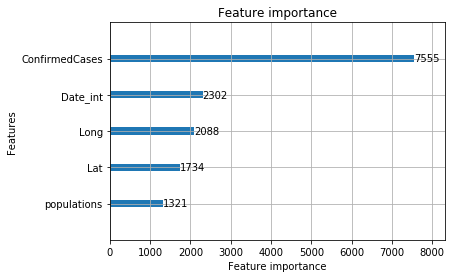

In [39]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000)

predicted_Fatalities = gbm.predict(X_test)
lgb.plot_importance(gbm)

In [ ]:
test_df.loc[:,'predicted_Fatalities'] = predicted_Fatalities 

In [ ]:
test_df.query('predicted_Fatalities > 1500')

In [ ]:
plt.plot(predicted_Fatalities)

In [ ]:
predicted_ConfirmedCases.reshape(len(predicted_ConfirmedCases))

In [ ]:
result_df = pd.DataFrame({'ForecastId':test_df['ForecastId'], 'ConfirmedCases':test_df['ConfirmedCases'],'Fatalities':predicted_Fatalities})

In [ ]:
result_df 

In [ ]:
result_df.to_csv('./submission.csv', index=False)

In [ ]:
!ls